# CS 237 Fall 2019   Homework Seven 


### Due date: PDF file due Friday October 25th @ 11:59PM in GradeScope with 12-hour grace period

### No late submissions!

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 10 are analytical problems about last
week's material, and the remaining problems are coding problems which will be discussed in lab next week. 

In [119]:
# Useful imports and definitions for CS 237

import numpy as np                # arrays and functions which operate on array
from numpy import linspace, arange, mean
import matplotlib.pyplot as plt   # normal plotting
#import seaborn as sns             # Fancy plotting 
#import pandas as pd               # Data input and manipulation

from random import random, randint, uniform, choice, sample, shuffle, seed
from collections import Counter
from math import log,floor,ceil, exp, factorial, e

%matplotlib inline

# Calculating permutations and combinations efficiently

def P(N,K):
    res = 1
    for i in range(K):
        res *= N
        N = N - 1
    return res
           
def C(N,K):
    if(K < N/2):
        K = N-K
    X = [1]*(K+1)
    for row in range(1,N-K+1):
        X[row] *= 2
        for col in range(row+1,K+1):
            X[col] = X[col]+X[col-1]
    return X[K]

def round4(x):
    return round(x+0.00000000001,4)

def round4_list(L):
    return [ round4(x) for x in L]

# Useful code from HW 01



# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution(Rx, fx, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#  draw_distribution([1,2,3,4], [0.25,0.35,0.15,0.25])

#  p = 0.14159234368

#  draw_distribution( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))

# This draws a useful bar chart for the distribution of the
# list of integer in outcomes

def show_distribution(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#show_distribution([1,4,3,5,4,6,2,4,3,5,4])
    
       
# Scipy statistical functions

from scipy.stats import norm, binom                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

# Note that in this library loc = mean and scale = standard deviation

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# probability density function

norm.pdf(x=50,loc=60, scale= 10)     

#a. Find P(X<50)
norm.cdf(x=50,loc=60,scale=10) # 0.4012936743170763

#b. Find P(X>50)
norm.sf(x=50,loc=60,scale=40) # 0.5987063256829237

#c. Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

#d. What is the minimum cost of the 5% most expensive houses? Alternately, what is x where P(X>x) = 0.05?
norm.isf(q=0.05,loc=60,scale=40)

#e. What is the maximum cost of the 5% cheapest houses? Alternately, what is x where P(X<x) = 0.05?
norm.ppf(q=0.05,loc=60,scale=40)

#f give the endpoints of the range for the central alpha percent of the distribution
norm.interval(alpha=0.3, loc=60, scale=140)

#g. generate a random variate
norm.rvs(loc=60, scale=40)

#h. generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)


##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]


# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass/density function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)


print()

## Problem One (Poisson)

This problem is a collection of several different applications of the basic formulae for the Poisson Distribution. You **must** use the Poisson and show all work. 

<p>(a) Assume that the probability that a poker hand is a full house is 0.0014. What
is the probability that in 500 random poker hands there are at least two full houses?</p>
<p>(b) On average, there are three misprints in every 10 pages of a particular book. If
every chapter of the book contains 35 pages, what is the probability that Chapters
1 and 5 have exactly 10 misprints each?</p>
<p>(c) Suppose that on a summer evening, shooting stars are observed at a Poisson rate
of one every 12 minutes. What is the probability that three shooting stars are
observed in 30 minutes?</p>
<p>(d) Suppose that in Japan earthquakes occur at a Poisson rate of three per week. What
is the probability that the next earthquake occurs after two weeks?</p>
<p>(e) Suppose that, for a telephone subscriber, the number of wrong numbers is Poisson,
at a rate of $\lambda$ = 1 per week. A certain subscriber has not received any wrong
numbers from Sunday through Friday. What is the probability that he receives no
wrong numbers on Saturday either?</p>

<p>Hint: Remember that the Poisson Distribution does not have the memory-less property, but
each arrival is *independent* of every other arrival, and in particular, two intervals of time
or space which do not overlap have an independent number of arrivals; so, like coins, arrivals don't have
memory...

In [120]:
def f_binomial(N,p,k):
    return C(N,k) * (1-p)**(N-k) * (p**k)

In [121]:
def f_geometric(k,p):
    return (1-p)**(k-1)*p

In [122]:
def Poi(x,u):
    a = ((e**-u) * (u**x))/factorial(x)
    return a

In [123]:
def Exp(x,u):
    a = 1 - e**(-u*x)
    return a

**Solution**

a) P(x,U) 

U(intensitiy) = 500 * 0.0014 = 0.7

1 - (P(0,0.7) + P(1,0.7)) = 

1 - (((e^-0.7) * (0.7^0))/0! + ((e^-0.7) * (0.7^1))/1!) = 0.155805

b) U = 3/10 * 35 = 10.5(mis. per chapter). Answer = 0.0153

c) 1/12 * 60 = 5(intensity in an hour) = 2.5(30min)



In [124]:
a = 1 - (Poi(0,0.7) + Poi(1,0.7))
round4(a)

0.1558

In [125]:
b = Poi(10, 10.5)
B = b**2
round4(B)

0.0153

In [126]:
c = Poi(3,2.5)
round4(c)

0.2138

In [127]:
round4(Poi(0,6))

0.0025

In [128]:
round4(1 - Exp(1,1/7))

0.8669

## Problem Two (Poisson compared with Exponential)

Suppose the emergency room at Mass General opens at 6am and has a mean arrival rate throughout the day of $\lambda$ = 6.9 patients per hour. </p>

You must use the Poisson for (a) - (c) and Exponential for (d) and (e).  Give the name of the distribution and show the parameters (for example, (a) is P(X=12) for X ~ Poi(6.9)), and show all work. 
<p>(a) What is the probability that exactly 12 patients arrive between 6am and 7am? (Use Poisson)</p>
<p>(b) What is the probability that no patient arrives before 7am? (Use Poisson)</p>

<p>(c) What is the probability that<span> a </span> patient arrives between 6:15 and 6:45? (Use Poisson)</p>
<p>(d) What is the probability that<span> the first</span> patient arrives between 6am and 7am? (Use Exponential)</p>
<p>(e) What is the probability that<span> no</span> patient arrives between 6:15 and 6:45? (Use Exponential)</p>

Hint: Some of these are complements of each other... 


<p><strong>Solution:</strong> 

In [129]:
# a) P(X=12) X~Poi(6.9)

round4(Poi(12,6.9))

0.0245

In [130]:
#P(X=0) X~Poi(6.9)
round4(Poi(0,6.9))

0.001

In [131]:
#P(X=0) X~Poi(6.9/2)
round4(1 - Poi(0,3.45))

0.9683

In [132]:
#P(X<=1) X~Exp(6.9)
Exp(1,6.9)

0.9989922145709514

In [133]:
# P(X>1)  X~Exp(6.9/2)
round4(1-Exp(1,3.45))

0.0317

## Problem Three (Exponential)

In the following assume that we are dealing with Poisson processes and can use the Exponential distribution.

(a) Suppose that every three months , on average, an earthquake occurs in
California. What is the probability that the next earthquake occurs after three but before
seven months?

(b) Suppose we model time to failure of TV tubes as an Exponential random variable and that tubes fail on average after 10 years. 
If Jim bought his TV set 10 years ago, what is the probability that its tube
will last another 10 years?

(c) Guests arrives at a hotel at an average rate of 5 per hour. Suppose that for the last 10 minutes no guest has arrived. What is the
probability that the next one will arrive in less than 2 minutes? 

(d) Considering the same situation as in (c), what is the probability that from the
arrival of the tenth to the arrival of the eleventh guest takes no more than 2 minutes?

Hint: Make sure in you understand the difference between the rate parameter $\lambda$ (= mean number of arrivals per unit time) and $\beta \,=\, 1/\lambda$ (= mean interarrival time). 

<strong> Solution: </strong>


In [134]:
#a) P(X<=7) - P(x<=3) X~Exp(1/3)
round4(Exp(7,1/3) - Exp(3,1/3))

0.2709

In [135]:
#b) P(X>10) X~Exp(1/10)

round4(1 - Exp(10,1/10))

0.3679

In [136]:
#c) P(X<2) X~Exp(5/60)

round4(Exp(2,5/60))

0.1535

In [137]:
#d
round4((Exp(2,5/60)))

0.1535

## Problem Four

(Continuous Distributions)  Let X be a continuous random variable with a frequency distribution (PMF) of the form 

$$ f(x) =
\begin{cases}
    {\large\frac{x}{4}} & \text{if $1\le x\le 3$} \\[4pt]
    \,0 & \text{otherwise} \\
\end{cases}$$
  
which can be graphed as follows:

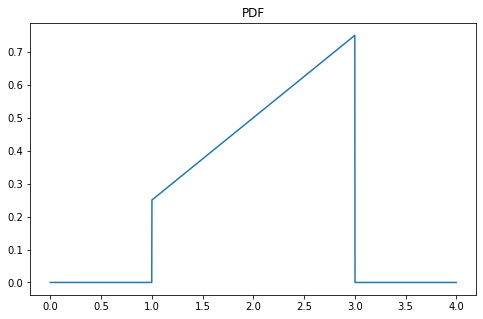

In [138]:
plt.figure(figsize=(8, 5))
plt.title("PDF")
plt.plot(np.arange(0,4,0.001),[x/4 if 1 <= x <= 3 else 0 for x in np.arange(0,4,0.001)]) #plot integral formula instead of x/4
plt.show()

  (a) Determine the formula  for the CDF $F_X$ using geometrical techniques (i.e., not using integrals, but considering what happens to the area to the left of a point $a$ by considering the area of geometrical shapes)
  
  (b) Determine the formula  for the CDF $F_X(x)$ using an integral. 
  
  (c) Plot the CDF $F_X(x)$ (using the code above as a model).
  
  (d) Find $P(X\ge 2)$ 
  
  (e) Find $E(X)$ 
  
For (d) -- (e) you must use mathematical techniques and not just calculate it using iterative techniques in Python code. You must show all your work, except that you may use Python to calculate results of mathematical formulae. 

<strong>Solution: </strong> 

$$ f(x) =
\begin{cases}
    \,1 & \text{if x > 3} \\
    {\large\frac{x^2 - 1}{8}} & \text{if $1\le x\le 3$} \\[4pt]
    \,0 & \text{if x< 1} \\
\end{cases}$$ 




$a) (x-1) * 0.25 + ((x-1) * (x/4 - 0.25))/ 2$

b)   ${ \int_{1}^{x}\frac{x}{4}dx}$    => (1/4)* ((x^2)/2) = $\frac{x^2-1}{8}dx$

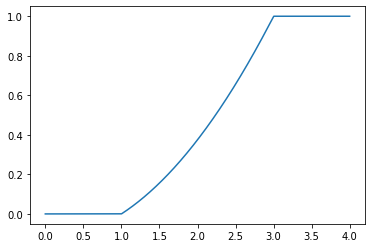

In [139]:
plt.plot(np.arange(0,4,0.001),[0 if x<=1 else ((x**2)-1)/8 if 1 <= x <= 3 else 1 for x in np.arange(0,4,0.001)])

In [140]:
# d) 1/8x2  plug 2 instead of x and subtract 1

1 - (((1/8)*2**2) - (1/8*1**2))

0.625

e) ${ \int_{∞ }^{-∞ }x *\frac{x}{4}dx}$ = ${ \int_{1}^{3}\frac{x^2}{4}dx}$ => (3^3)/12 - (1^3)/12 = 27/12 - 1/12 = 26/12

# Scipy.stats 

For the following, use the statistical functions given at the top of this notebook. 

Also consider using the Distributions Notebook posted online to visualize these distributions (but use scipy.stats for the calculations). 

You are not required to do so, but a nice touch is to print out your answer in a code block, i.e., if
you were asked "What is the probability in the standard normal that a value occurs in the interval between
-0.94 and 1.2 standard deviations from 0," you could answer as follows:

In [141]:
mu = 0
sigma = 1
lo = -0.94
hi = 1.2

answer = norm.cdf(x=hi,loc=mu,scale=sigma) - norm.cdf(x=lo,loc=mu,scale=sigma)
print("Solution: " + str(round4(answer)))

Solution: 0.7113


## Problem Five (Normal Distribution)

Suppose that in a population of individuals, their height is  normally distributed with a mean of 68 inches and a standard deviation of 1.45 inches. </p>

<p> (a) 
  What is the probability that a randomly-selected individual has a height less than 66 inches?</p>
  
<p>(b) What is the probability that a randomly-selected individual has a height more than 72 inches?</p>

<p>(c) What is the probability that a randomly-selected individual has a height between 66.5 and 71 inches?</p>
 

![](hw07.4c.png)

<strong>Solution:</strong> 


In [142]:
# a)
round4(norm.cdf(x=66,loc=68,scale=1.45))

0.0839

In [143]:
# b)
round4(norm.sf(x=72,loc=68,scale=1.45))

0.0029

In [144]:
round4(norm.cdf(x=71,loc=68,scale=1.45) - norm.cdf(x=66.5,loc=68,scale=1.45))

0.8303

 ## Problem Six (Standard Normal Distribution)
    
Using the same mean and standard deviation as in the previous problem (mean of 68 inches and a standard deviation of 1.45 inches), show how to answer the following questions by first converting to the standard normal distribution (with mean 0 and standard deviation 1), and then calculating the answer in terms of the standard normal (i.e., when you calculate the probabilities, you will be using N(0,1).)  Show all work. For (c) you will not need to convert, but simply use the standard normal directly. 
 
(a) What is the probability that a randomly-selected individual has a height more than 69 inches?


(b) What is the probability that a randomly-selected individual has a height between 63.2 and 70.7 inches?


(c) What is the probability that someone is more than 2.7 standard deviations taller than the average height?


<strong>Solution:</strong> 

N(0,1) => N(mean,variance)

a)

z = (69 - 68)/1.45 = 1/1.45
z = 0.6897

round4(norm.cdf(x=0.6897,loc=0,scale=1)) = 0.2452

b)

z1 = (70.7 - 68)/1.45 = 1.8621

z2 = (63.2 - 68)/1.45 = -3.3103

z1 - z2 = 0.9682

c) 0.0035

In [145]:
round4(norm.sf(x=0.6897,loc=0,scale=1))

0.2452

In [146]:
round4(norm.cdf(x=1.8621,loc=0,scale=1) - norm.cdf(x=-3.3103,loc=0,scale=1))

0.9682

In [147]:
round4(norm.sf(x=2.7,loc=0,scale=1))

0.0035

## Problem Seven (Normal Distribution)

Suppose the grades on the 237 midterm are normally distributed with mean 83 and variance of 23. Answer the following questions.  By the "k<sup>th</sup> percentile" we mean the x value for which $P(X \le x) = k/100$ (meaning $k$ is in percentages, and $k/100$ is in terms of probabilities.) 

Browse the functions from <code>scipy.stats.norm</code> given to see which one will solve each problem. 

(a) If an A is 93 or above, what percentage of the class will get an A?

(b) What is the exam score which represents the 90<sup>th</sup> percentile? (Assume exam scores are real numbers.)

(c) If a score between 70 and 80 results in a C, and there are 120 people in the class, approximately how many people will get a C? (Round to the nearest integer.) 

<strong>Solution:</strong>

s.d = sqrt of 23 = 4.796

a) 0.0185 = 1.8531%

b) 89.1463

c) Approximately 31 students if you consider (c) as 31.49 or 32 if you consider (c) as 31.5 

In [148]:
# (a)
round4(norm.sf(x=93,loc=83,scale=4.796))

0.0185

In [149]:
round4(norm.ppf(q=0.9,loc=83,scale=4.796))

89.1463

In [150]:
# Find P(70<X<80)
round4((norm.cdf(x=80,loc=83,scale=4.796) - norm.cdf(x=70,loc=83,scale=4.796))*120)

31.4948

## Problem Eight (Combining Poisson with other Distributions)

Suppose that in a certain region of California, earthquakes occur at the average rate of 7 per year. </p>
<blockquote>
  <p>(a) What is the probability that in exactly three of the next eight years, no earthquakes occur?</p>
   <p>(b) What is the **expect**ed number of years to wait until we have a year with exactly 7 earthquakes?</p>
    <p>(c) In the next century, how many years would you **expect** to see with more than 10 earthquakes?</p>
</blockquote>

Hint: When you see the word "expect" you should expect to use the expected value!

**Solution**

intensity = 7

a) 4.2269e-08

b) 6.7113

c)P(X>10)*100 = 9.85

In [151]:
#x~Poi(7)

#round4(Poi(0,2.625))
no_earth = (Poi(0,7))
f_binomial(8,no_earth,3)

4.226908795802451e-08

In [152]:
p = (Poi(7,7))
# E(x) of Geometric = 1/Poi(7,7)
round4(1/p)

6.7113

## Problem Nine (Combining Normal with Other Distributions)

Suppose that in the Men's Olympic Ski Team, the chest size measurements are normally distributed with a mean of 39.8 inches and a standard deviation of 2.05 inches.


(a) What the probability that of 20 randomly selected members of the team, at least 5 have a chest size of at least 41.7 inches?

(b) Supposing we choose men on the team repeatedly and with replacement, how many men would you expect to choose before finding a member with a chest measurement of less than 37 inches?

Hint: Let X is a normally distributed random variable according to the parameters given in the first sentence. Then consider Y and Z be appropriately distributed random variables for (a) and (b) respectively. 

<strong>Solution</strong>

a) Z = (41.7 - 39.8)/2.05 = 0.9268

P(X>0.9268) = 0.1770

Y-Bino(20,0.9268)

P(X>=5) = 0.2725


b) Z = (37 - 39.8)/2.05 = -1.36585

P(X<-1.36585) = 0.086

Z-Bino(20,0.086) 

E(X) = 20*v = 1.72 or around 2 men

In [153]:
# problem a
# probability it is more than 0.9268 P(X>93) and use that probability in binomial
z = (norm.sf(x=0.92683,loc=0,scale=1))
round4(1-(f_binomial(20,z,0) + f_binomial(20,z,1) + f_binomial(20,z,2) + f_binomial(20,z,3) + f_binomial(20,z,4)))

0.2725

In [154]:
#problem b)
v = (norm.cdf(x=-1.36585,loc=0,scale=1))

#Z~Bino(20,v) E(X)= Np or 20v in our case
round4(20 * v)

1.7199

## Problem Ten (Normal Approximation to the Binomial)

This problem concerns the normal approximation to the binomial. The &quot;continuity correction&quot; (sometimes called Yates's Continuity Correction) is a technique I will show in the Monday 10/21 lecture for improving the accurate of the normal approximation. 

In this problem we will measure the accuracy of the approximations by using
*absolute percentage error*, which is defined to be:

$$  \frac{\vert\,\text{measured value} - \text{actual value}\,\vert}{\text{actual value}}\times 100.$$

</p>
<p>(a) Suppose of all the kids that show up on Halloween night, 58% are dressed in Deadpool costumes. If 60 kids show up, what is the probability that <span>between 33 and 38</span> (inclusive) kids will be dressed in Deadpool costumes? (Use the binomial.)</p>
<p>(b) Repeat the previous question, but using the normal approximation to the binomial, without using the continuity correction, and express the accuracy of your approximation using the absolute percentage error.</p>
<p>(c) Repeat the previous question, but now using the continuity correction, again showing the accuracy using the absolute percentage error. </p>


<strong>Solution: </strong> 


In [155]:
#(a) Find P(60<X<80)
a1 = round4(f_binomial(60,0.58,33) + f_binomial(60,0.58,34) + f_binomial(60,0.58,35) + f_binomial(60,0.58,36)+ f_binomial(60,0.58,37) 
+ f_binomial(60,0.58,38))
print(a1)


0.5609


In [156]:
b1 = round4(norm.cdf(x = 38, loc = 34.8, scale = 3.82) - norm.cdf(x=33,loc=34.8,scale=3.82))
print(b1)
print("Absolute Percentage Error: " + str(14.3876) + "%")

0.4802
Absolute Percentage Error: 14.3876%


In [157]:
c1 = round4(norm.cdf(x = 38.5, loc = 34.8, scale = 3.82) - norm.cdf(x=32.5,loc=34.8,scale=3.82))
print(c1)
print("Absolute Percentage Error: " + str(0.1426) + "%")

0.5601
Absolute Percentage Error: 0.1426%


# Lab Problems

## Generating Variates from a Continuous Distribution

Samples from a given distribution are often called "random variates" or just "variates" for short; to 
generate <i>size</i> random variates from a normal distribution with mean <i>loc</i> and standard 
deviation <i> scale </i> we can use the <code>scipy.stats</code> function 
<pre>
 X = norm.rvs(loc=0,scale=1,size=num_trials)
</pre>

(Note that in this case, the normal is defined in terms of the standard devation, and <i>not</i> the variance.)

Run the next cell several times to get a sense for how this function works

In [158]:
print("From N(0,1):")
X = norm.rvs()       # default is a standard normal with mean 0 and standard deviation 1
print(X)
print()
print("From N(10,2^2):")
X = norm.rvs(10,2)   # defined by mean and standard deviation (NOT the variance)
print(X)
print()
print("Ten  variates from N(66,3^2):")
X = norm.rvs(66,3,size=10)
print(X)


From N(0,1):
2.4645901228104976

From N(10,2^2):
8.499890518273183

Ten  variates from N(66,3^2):
[60.22354105 60.85914119 67.17587651 66.82390426 64.23522175 68.02266762
 58.92625012 69.74201117 67.03907656 67.01409306]


### Graphing Continuous Variates: A Problem
So generating normal variates is easy! Think of them as heights of BU students picked at random. We'll assume they have a mean height of 66 inches with a variance of 3 inches. 

What we are going to concern ourselves with in this first problem is now to display a collection of such normal numbers.

Here is the problem: since each value occurs (with high probability) only once, we can't just create a histogram and convert it into a frequency distribution. **Essentially we are trying to create a frequency distribution from values whose theoretical probability is 0.**

Here is what happens if we do this, and graph it as a scatter plot against the theoretical (continuous) distribution:

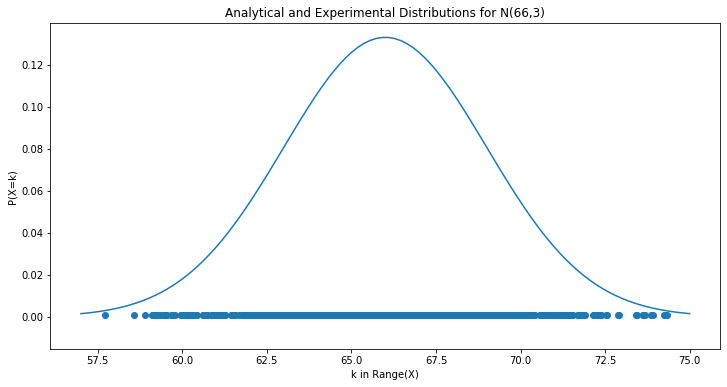

In [159]:
def display_normal_samples(mu,sigma,num_trials):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for N('+str(mu)+','+str(sigma)+')')
    plt.ylabel("P(X=k)")
    plt.xlabel("k in Range(X)")
    # use normal(...) to generate random samples
    X = sorted(norm.rvs(mu,sigma,num_trials))
    # Now convert frequency counts into probabilities
    D = Counter( X )
    P = [D[k]/num_trials for k in X]
    plt.scatter(X,P)
    # Now generate the theoretical normal with the same mean and 
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

# try setting the number of trials - the number of samples generated -- to 100 and 1000.
num_trials = 1000
display_normal_samples(66,3,num_trials)

### Graphing Continuous Variates with Bins
You see the problem: since each floating point number (an approximation of a real number) is 
    generated with high probability at most once, we can't see the accumulation of samples that would
    indicate the probability. What to do?  Well, you know that probabilities can only be calculated in continuous distributions using <i>intervals</i>, so we will create equally-sized intervals to collect together our samples from the continuous distribution. Then we must "slot" each variate into its appropriate bin and calculate the probabilities.    

The pyplot function hist(...) does the slotting, if we give it a list of outcomes and the bin boundaries, so
that really all we have to do is define the bins.  

**In essence, we are turning a continuous distribution into a discrete one for the purposes of visualizing it.**

### Graphing Normal Variates with Bins Calculated from Standard Deviation

For the normal distribution it makes sense to define the bin boundaries in terms of standard deviations from the mean, since we will be dealing with an unknown range of data; this bins can be made as wide or as narrow as we want, but will represent an interval defined in terms of the standard deviation sigma of the distribution. 

We will graph the distribution in a range of at least 4 standard deviations of the mean, ignoring the rare occurance of a variate outside this range. 

In [160]:
# Define the boundaries of bins with the specified width around the mean, 
# to plus/minus at least 4 * sigma

# bin_width is in units of sigma, so bin_width = 0.1 means sigma/10

def makeBins(mu,sigma,bin_width):
    numBins = ceil(4/bin_width)
    bins = [mu+sigma*bin_width*x for x in range(-numBins,numBins+1)]
    return bins

# Change the parameters several times to see the effect of this

print(makeBins(66,5,.5))
           

[46.0, 48.5, 51.0, 53.5, 56.0, 58.5, 61.0, 63.5, 66.0, 68.5, 71.0, 73.5, 76.0, 78.5, 81.0, 83.5, 86.0]


## Problem Eleven: Generating and Graphing Normal Variates

### How does the number of trials affect the fit of the data to the normal distribution?
Now let's do our previous experiment but trying various 
values for bin_width...

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


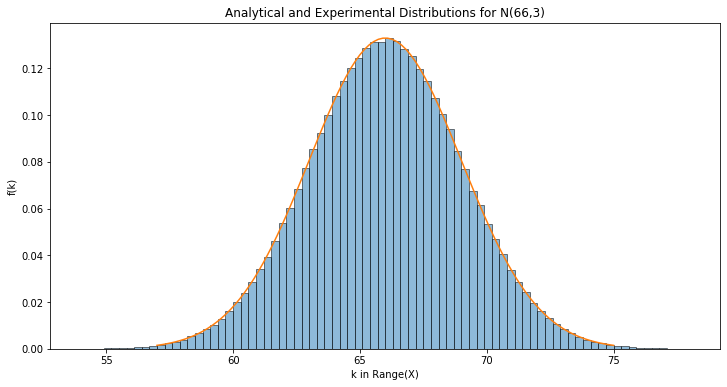

In [161]:
def display_normal_samples_binned(mu,sigma,num_trials,bin_widths):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for N('+str(mu)+','+str(sigma)+')')
    plt.ylabel("f(k)")
    plt.xlabel("k in Range(X)")
    # use norm.rvs(...) to generate random samples
    X = norm.rvs(mu,sigma,num_trials)
    plt.hist(X,bins=makeBins(mu,sigma,bin_widths),normed=True,edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    # if get deprecation warning for normed, use the next line instead (or don't worry about it)
    # plt.hist(X,bins=makeBins(mu,sigma,bin_widths),density=True,edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
 
    # Now generate the theoretical normal with the same mean and 
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()
    
#try each of these and observe the effects

N = 1000000     # try 100, 1000, and 1,000,000

display_normal_samples_binned(66,3,N,0.1)       
   

<b>Clearly the data seems to fit the normal better when the number of trials increases...</b>

### Affect of the bin width

But now let's think about the issue of precision, i.e., the width of the bins.
Again, try each of the following and see what happens. You can see that too-wide bins don't give much information, but too-narrow bins don't show how the data fits the normal distribution. There is a relationship between the number of data points and the width of the bins.

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


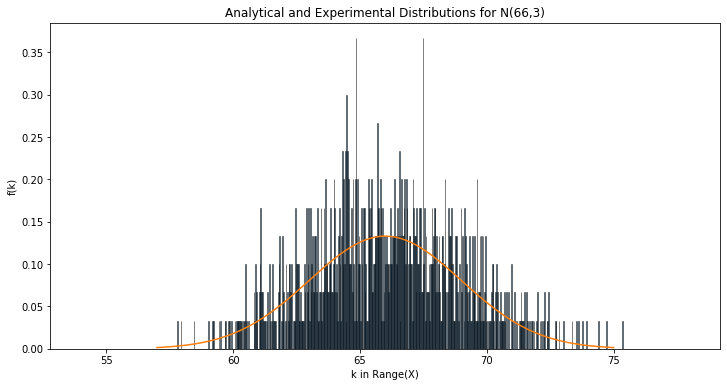

In [162]:
bin_width = 0.01       # try changing this to 0.5, 0.2, 0.1, 0.05, and 0.01

display_normal_samples_binned(66,3,1000,bin_width)

### Problem 11 (a)
Clearly the "fit" with the normal curve depends on the width of the bins!
For the following three examples, find a value for the indicated parameter which gives a good correspondence
between the normal curve and the data. 

For the rest of these problems, just leave the code with your solution value and display the results -- no need to do anything else. 

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


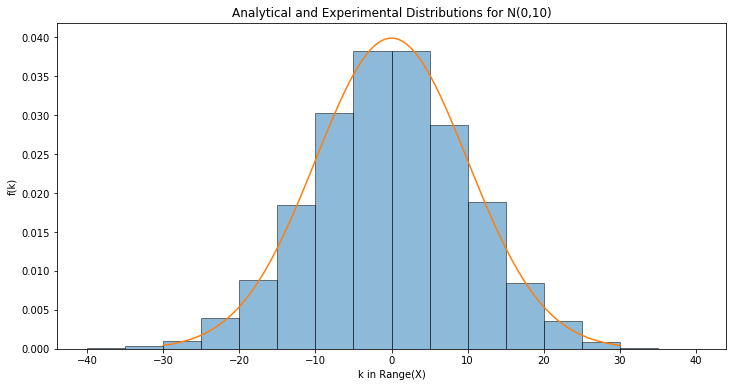

In [177]:
# Problem 1(a)

bin_width = 0.5    # experiment with this value 0.01, 0.05, 0.1, 0.15, etc. -- find the 
                   # largest number which still gives a good fit
    
display_normal_samples_binned(0,10,3000,bin_width)     # don't change this line



### Problem 11 (b)

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


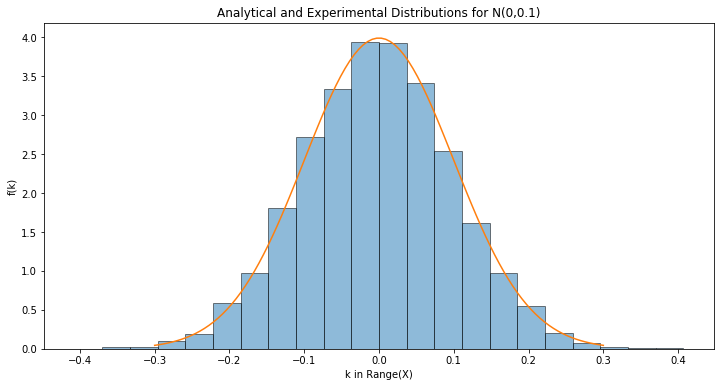

In [211]:
## Problem 1(b)

bin_width = 0.37     # experiment with this value -- find the largest number which still gives a good fit

display_normal_samples_binned(0,0.1,10000,bin_width)     # don't change this line



### Problem 11 (c)

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


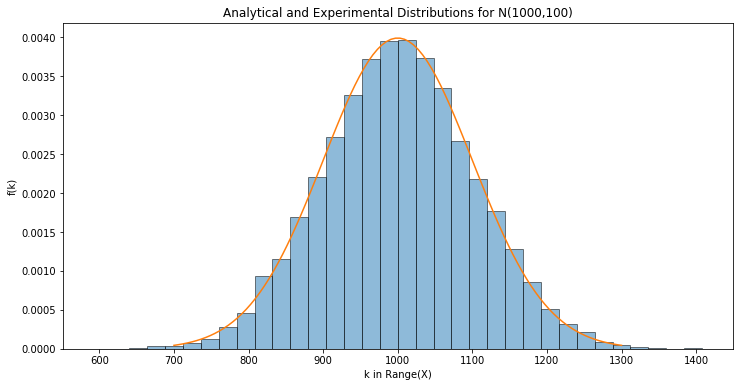

In [165]:
# Problem 11(c)

bin_width = 0.24    # experiment with this value -- find the largest number which still gives a good fit

display_normal_samples_binned(1000,100,10000,bin_width)     # don't change this line



### Problem 11 (d) 

What do you think is a good value for bin_width in general, assuming that num_trials is 
sufficient to give a reasonable approximation of the normal distribution



**Solution**

I noticed a correlation between the num_trials and bin_width. It seems if you increase the num_trials, you need to decrese the bin_width to illustrate that data accurately. 0.1 bin_width seems to work the best with big num_trials value.

##  Problem Twelve: Generating Poisson and Exponential Variates

Following up on HW 5, Problem 12,  we now explore how to generate random variates from the Exponential and Poisson Distributions. We will display the results using a similar "binning" technique like we used in the previous problem. 

### Part (A)

The following formula should look familiar!  If U is a random variable uniformly distributed in the range [0..1), then

$$  Y =   \frac{- \ln{( U )} }{\lambda}  $$            
          
is a real number which is distributed according to the Exponential Distribution with rate parameter $\lambda$, 
i.e., 

$$ Y \sim Exp(\lambda).$$

Note: $\ln$ is log to the base $e$ (just <code>log(...)</code> in Python). 


For this problem, you must create a function <code>exp_rvs(...)</code> which generates exponential variates, using this formula (it is very similar to your solution to the last problem in HW 5), and demonstrate it by printing out 10 values for $\lambda = 4$. 



In [166]:
## Solution for (A)

def exp_rvs(lam):
    u = random()
    answer1 = -log(u)/lam
    return answer1            # your answer here

# test it

seed(0)

lam = 4 
          
num_trials = 10
# u = np.random.uniform(0,1) answer1 = [1 + (math.floor(log(random())/ log(1-p))) for i in range(num_trials)]

value = [exp_rvs(lam) for i in range(num_trials)]
print(value)
#exp_rvs(lam)

# seed doesn't work?

[0.04227577129370466, 0.06928301239535861, 0.21653514653972164, 0.3378121740979418, 0.16771205450973864, 0.22600771216986748, 0.060900798344498956, 0.2982477266126604, 0.18527102628047376, 0.1347282520024191]


### Part (B)

Now you must complete the following code template to display
the results of generating $10^5$ exponential variates from Exp(1), and
finding a way to bin the results so that you get an accurate idea
of how well they fit the theoretical distribution. 

The binning here is a little simpler than in the case of the normal distribution, we will simply give the values we want
to display (since the range is infinite) and the number of bins to show. This might involve a little tweaking to get a good diagram....

In order to prepare your experimental results with the theory, you will have to write
the function for the exponential pdf (easy, but humor me!). 


Optional: Can you think of a way of limiting the range based on $\lambda$?

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


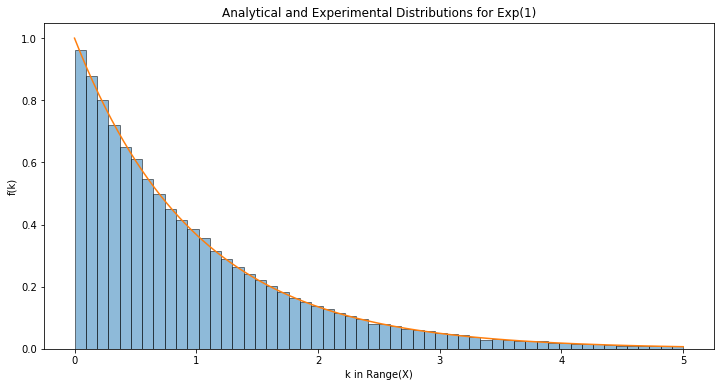

In [167]:
## Solution for (B)

def exp_pdf(lam,x):
    if (x>=0):
        return(lam*e**(-lam*x))
    else:
        return 0
    #return 0                   # Your answer here


def display_exponential_samples_binned(lam,num_trials,limit,num_bins):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for Exp('+str(lam)+')')
    plt.ylabel("f(k)")
    plt.xlabel("k in Range(X)")
    # use exp_rvs(...) to generate random samples
    X = [exp_rvs(lam) for k in range(num_trials)]
    # filter out those above the limit
    X1 = [ x for x in X if x < limit ]
    # make the bins
    bs = linspace(0,limit,num_bins)
    plt.hist(X,bins=bs,normed=True,edgecolor='k',alpha=0.5)
    #plt.hist(X,bins=bs,density=True,edgecolor='k',alpha=0.5)          # use this line if get warning about normed
    # Now generate the theoretical distribution with the same rate
    X2 = linspace(0,limit,100)
    Y = [ exp_pdf(lam,x) for x in X2]
    plt.plot(X2,Y)
    plt.show()

# test it
          
lam = 1 
          
num_trials = 10**5

# You will only display values in range [0 .. limit]

limit = 5        # Your answer here        

# The range will be put into this many bins

num_bins = 55     # Your answer here

seed(0)

display_exponential_samples_binned(lam,num_trials,limit,num_bins)

### Part (C)

Now we will generate Poisson random variates by simulation, counting how many exponentially-distributed arrivals occur in a unit time (using our result from (a)). 


For this problem, first recall that $\lambda$ is the number of arrivals per unit time (meaning in 1.0 time units);
so to simulate one "poke" at the Poisson RV <code>poi_rvs(lam)</code> you should "poke" the exponential RV you wrote above, summing the values until you exceed 1.0, then you can count how many arrivals in fact arrived between times 0 and 1.0. 

Fill in the function stub and verify by running the code block to see the results (you can compare them
with the theoretical distribution on the Distributions notebook). 
 


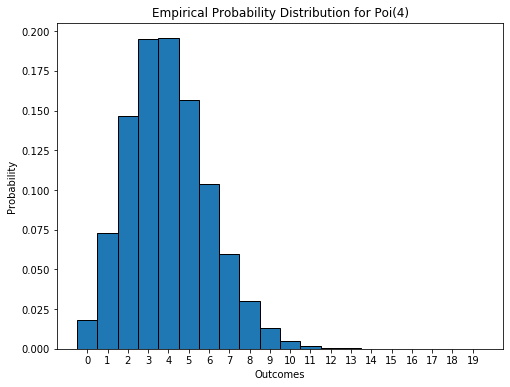

In [168]:
## Solution for (C)

def poi_rvs(lam):
    count = 0
    total = 0
    while (total <= 1):
        t = exp_rvs(lam)
        total = total + t
        count = count + 1
    return (count-1)
          
lam = 4 
          
num_trials = 10**6

seed(0)

Outcomes12c = [ poi_rvs(lam) for k in range(num_trials)]

show_distribution( Outcomes12c , "Empirical Probability Distribution for Poi(" + str(lam) + ")")
